In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import csv
from math import log10

In [2]:
data = pd.read_csv('input/feedback-prize-2021/train.csv')

In [3]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])

not_word = [',', ':', '.', '?', '!', ')', '(', ';', '/', '-', '"', '\'', '_']

def cleaning(text:str) -> str:

  text = text.lower()
  text = remove_stopwords(text)

  for char in not_word:
    text = text.replace(char, ' ')

  return text


def count_words(l : str) -> dict:
  words = l.split()

  return Counter(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zumo0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
class_grouped = data.groupby(by='discourse_type')

In [7]:
for key, gp in class_grouped:
  group = class_grouped.get_group(key)['discourse_text']
  l=''
  for i in range(len(group)):
    text = group.iloc[i]
    text = cleaning(text)
    l = l + text
  
  words_count = count_words(l)

  f = open("csv/" + key + ".csv", "w")
  writer = csv.writer(f)
  for key, value in words_count.items():
    writer.writerow([key, value])

  f.close()



In [8]:

reader = csv.reader(open('csv/Claim.csv', 'r'))
dict_claim = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_claim[k] = v

reader = csv.reader(open('csv/Concluding Statement.csv', 'r'))
dict_concluding = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_concluding[k] = v

reader = csv.reader(open('csv/Counterclaim.csv', 'r'))
dict_counterclaim = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_counterclaim[k] = v


reader = csv.reader(open('csv/Evidence.csv', 'r'))
dict_evidence = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_evidence[k] = v

reader = csv.reader(open('csv/Lead.csv', 'r'))
dict_lead = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_lead[k] = v

reader = csv.reader(open('csv/Position.csv', 'r'))
dict_position = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_position[k] = v

reader = csv.reader(open('csv/Rebuttal.csv', 'r'))
dict_rebuttal = {}
for row in reader:
   if len(row) == 0:
      continue
   k, v = row
   dict_rebuttal[k] = v

In [9]:
import numpy as np

def correlation(word : str) -> np.array:

  n_claim = int(dict_claim[word]) if word in dict_claim else 0
  n_concluding = int(dict_concluding[word]) if word in dict_concluding else 0
  n_counterclaim = int(dict_counterclaim[word]) if word in dict_counterclaim else 0
  n_evidence = int(dict_evidence[word]) if word in dict_evidence else 0
  n_lead = int(dict_lead[word]) if word in dict_lead else 0
  n_position = int(dict_position[word]) if word in dict_position else 0
  n_rebuttal = int(dict_rebuttal[word]) if word in dict_rebuttal else 0


  total = n_claim + n_concluding + n_counterclaim + n_evidence + n_lead + n_position + n_rebuttal
  idf = log10(144293/total)
  return np.array((n_claim/len(dict_claim), n_concluding/len(dict_concluding), n_counterclaim/len(dict_counterclaim), \
                   n_evidence/(len(dict_evidence)), n_lead/len(dict_lead), n_position/len(dict_position), n_rebuttal/len(dict_rebuttal)))*idf


In [10]:
word_list = set()

for w in dict_claim:
  word_list.add(w)

for w in dict_concluding:
  word_list.add(w)

for w in dict_counterclaim:
  word_list.add(w)

for w in dict_evidence:
  word_list.add(w)

for w in dict_lead:
  word_list.add(w)

for w in dict_position:
  word_list.add(w)

for w in dict_rebuttal:
  word_list.add(w)




In [11]:
matrix = np.zeros((len(word_list), 7))
i = 0
for w in word_list:
  matrix[i, :] = correlation(w)
  i += 1
  

In [12]:
weights_matrix = pd.DataFrame(matrix, columns =['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal'])
words = pd.DataFrame(word_list, columns=['Words'])
p = pd.concat([words, weights_matrix], axis=1)

In [13]:
p.to_csv('csv/weights_matrix.csv')

In [14]:
p

,Words,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
0,bribed,0.000000,0.000264,0.0,0.000401,0.000000,0.000000,0.000000
1,namedose,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000725
2,mountin,0.000179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,learining,0.000000,0.000277,0.0,0.000105,0.000313,0.000000,0.000000
4,thinkadvice,0.000000,0.000000,0.0,0.000000,0.000000,0.000463,0.000000
...,...,...,...,...,...,...,...,...
76168,in2019,0.000179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
76169,altogethernumerous,0.000000,0.000305,0.0,0.000000,0.000000,0.000000,0.000000
76170,elaborated,0.000000,0.000000,0.0,0.000109,0.000000,0.000436,0.000000
76171,profided,0.000000,0.000305,0.0,0.000000,0.000000,0.000000,0.000000


Claim


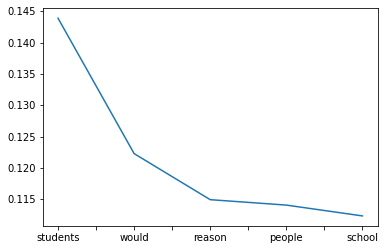

Concluding Statement


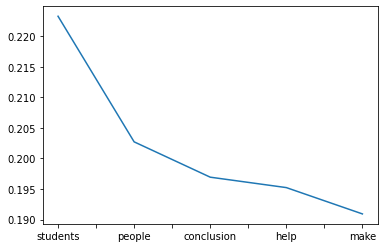

Counterclaim


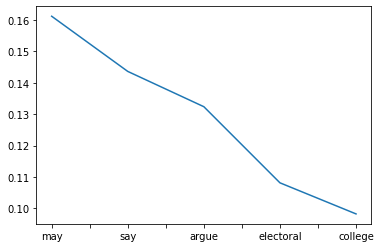

Evidence


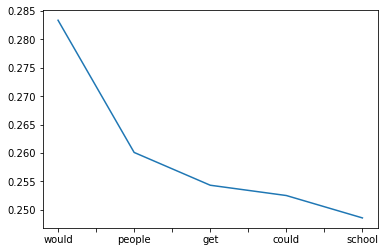

Lead


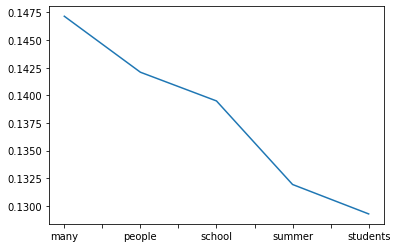

Position


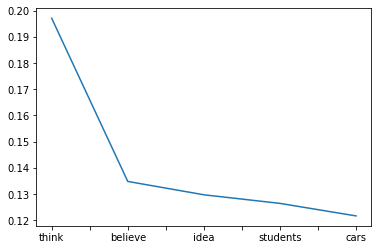

Rebuttal


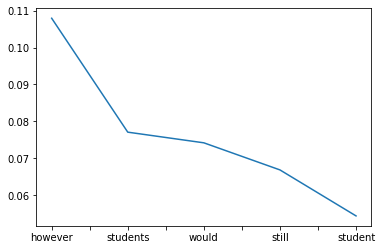

In [40]:
for col in ['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal']:
    print(col)

    df = p[["Words", col]].sort_values(by=[col], ascending=False)

    df = df.head(5)
    w = df['Words'].values
    v = df[col].values

    s = pd.Series(data=v, index=w)
    s.plot()
    plt.show()

In [47]:
df = pd.DataFrame(matrix, columns =['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal'], index=list(word_list))

In [48]:
df

,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
bribed,0.000000,0.000264,0.0,0.000401,0.000000,0.000000,0.000000
namedose,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000725
mountin,0.000179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
learining,0.000000,0.000277,0.0,0.000105,0.000313,0.000000,0.000000
thinkadvice,0.000000,0.000000,0.0,0.000000,0.000000,0.000463,0.000000
...,...,...,...,...,...,...,...
in2019,0.000179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
altogethernumerous,0.000000,0.000305,0.0,0.000000,0.000000,0.000000,0.000000
elaborated,0.000000,0.000000,0.0,0.000109,0.000000,0.000436,0.000000
profided,0.000000,0.000305,0.0,0.000000,0.000000,0.000000,0.000000


In [69]:
keep = []

for i, data in df.iterrows():
    if (data > 0.15).any():
        keep.append(i)
len(keep)

38

In [72]:
df_filt = df.loc[keep]

<AxesSubplot:>

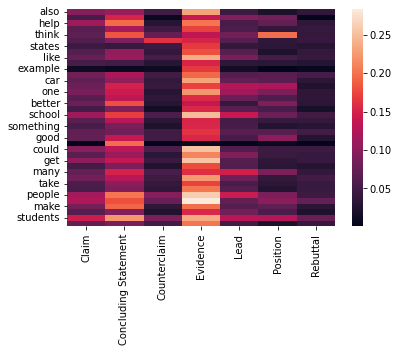

In [73]:
import seaborn as sns
sns.heatmap(df_filt)